# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [11]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

## Part1: Linear Regression

E_train is 0.28776631476619585, E_test is 1.373727201026743


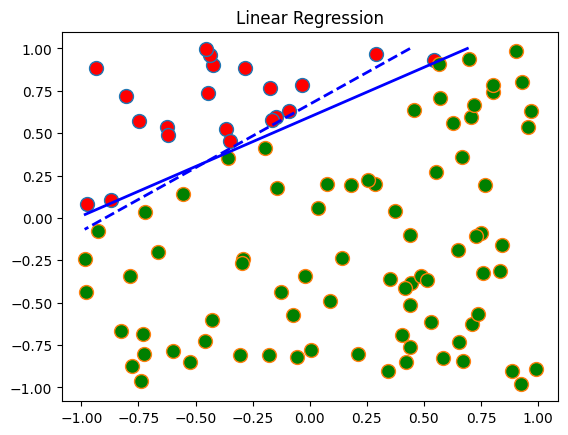

In [4]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data

E_train_sum = 0
E_test_sum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    #TODO
    # Compute training, testing error
    X_train_b = np.vstack((np.ones((1, nTrain)), X))
    y_pred_train = np.matmul(w_g.T, X_train_b)
    E_train_sum += np.mean((y_pred_train - y)**2)

    X_test, y_test, _ = mkdata(nTrain * 10)  # 使用更多数据点来估计测试误差
    X_test_b = np.vstack((np.ones((1, nTrain * 10)), X_test))
    y_pred_test = np.matmul(w_g.T, X_test_b)
    E_test_sum += np.mean((y_pred_test - y_test)**2)

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep


print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part2: Linear Regression: noisy

E_train is 0.28776631476619585, E_test is 1.373727201026743


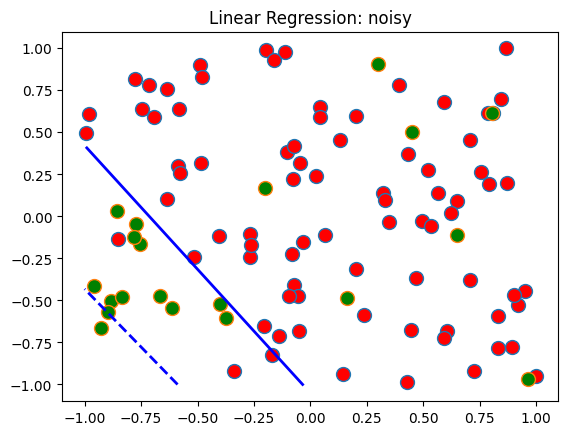

In [ ]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y)
    #TODO
    # Compute training, testing error
    #训练误差
    X_train_b = np.vstack((np.ones((1, nTrain)), X))
    y_pred_train = np.matmul(w_g.T, X_train_b)
    E_train_sum += np.mean((y_pred_train - y)**2)

    # 测试误差
    X_test, y_test, _ = mkdata(nTrain * 10, 'noisy')
    X_test_b = np.vstack((np.ones((1, nTrain * 10)), X_test))
    y_pred_test = np.matmul(w_g.T, X_test_b)
    E_test_sum += np.mean((y_pred_test - y_test)**2)
    # end


print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part3: Linear Regression: poly_fit

In [6]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
#TODO
# Compute training, testing error
X_train_b = np.vstack((np.ones((1, X.shape[1])), X))
y_pred_train = np.matmul(w.T, X_train_b)
E_train = np.mean((y_pred_train - y)**2)

X_test_b = np.vstack((np.ones((1, X_test.shape[1])), X_test))
y_pred_test = np.matmul(w.T, X_test_b)
E_test = np.mean((y_pred_test - y_test)**2)

print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = X  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = X_test  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
#TODO
# Compute training, testing error
X_train_t_b = np.vstack((np.ones((1, X_t.shape[1])), X_t))
y_pred_train = np.matmul(w.T, X_train_t_b)
E_train = np.mean((y_pred_train - y)**2)

X_test_t_b = np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t))
y_pred_test = np.matmul(w.T, X_test_t_b)
E_test = np.mean((y_pred_test - y_test)**2)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.9784045613544557, E_test is 1.0256475569026184
E_train is 0.9784045613544557, E_test is 1.0256475569026184


## Part4: Logistic Regression

E_train is 0.9784045613544557, E_test is 1.0256475569026184


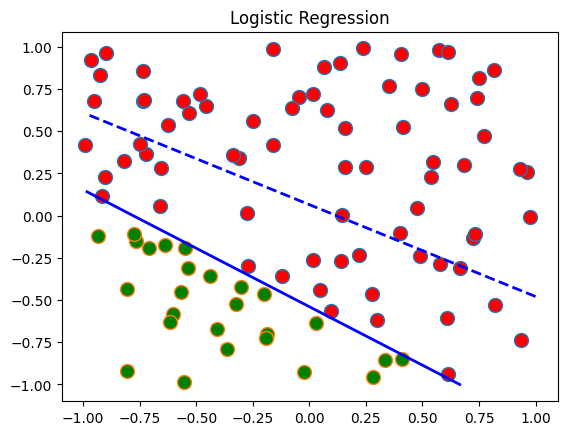

In [ ]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y)
    #TODO
    # Compute training, testing error
    #训练误差
    X_train_b = np.vstack((np.ones((1, nTrain)), X))
    y_pred_train = np.sign(np.matmul(w_g.T, X_train_b))
    y_binary_train = np.where(y == 0, -1, 1)
    E_train_sum += np.mean(y_pred_train != y_binary_train)

    # 测试误差
    X_test, y_test, _ = mkdata(nTrain * 10)
    X_test_b = np.vstack((np.ones((1, nTrain * 10)), X_test))
    y_pred_test = np.sign(np.matmul(w_g.T, X_test_b))
    y_binary_test = np.where(y_test == 0, -1, 1)
    E_test_sum += np.mean(y_pred_test != y_binary_test)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part5: Logistic Regression: noisy

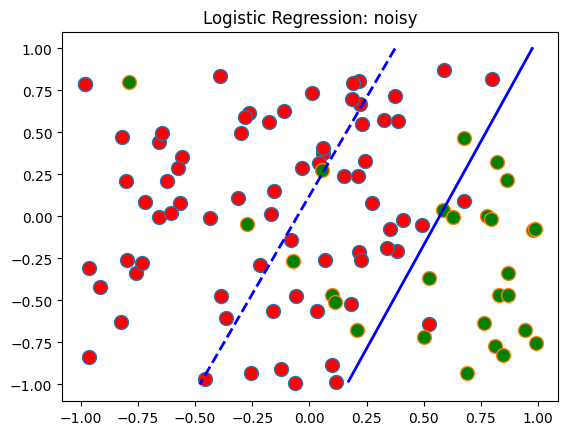

In [8]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    #TODO
    # Compute training, testing error
    # 训练误差
    X_train_b = np.vstack((np.ones((1, nTrain)), X))
    y_pred_train = np.sign(np.matmul(w_g.T, X_train_b))
    y_binary_train = np.where(y == 0, -1, 1)
    E_train_sum += np.mean(y_pred_train != y_binary_train)
    
    # 测试误差
    X_test, y_test, _ = mkdata(nTest, 'noisy')
    X_test_b = np.vstack((np.ones((1, nTest)), X_test))
    y_pred_test = np.sign(np.matmul(w_g.T, X_test_b))
    y_binary_test = np.where(y_test == 0, -1, 1)
    E_test_sum += np.mean(y_pred_test != y_binary_test)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part6: SVM

In [ ]:
from svm import svm

nRep = 1000; # number of replica tes
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    #TODO
    # Compute training, testing error
    # Sum up number of support vectors
    #训练误差
    X_train_b = np.vstack((np.ones((1, nTrain)), X))
    y_pred_train = np.sign(np.matmul(w_g.T, X_train_b))
    y_binary_train = np.where(y == 0, -1, 1)
    E_train_sum += np.mean(y_pred_train != y_binary_train)

    # 测试误差
    X_test, y_test, _ = mkdata(nTrain * 10)
    X_test_b = np.vstack((np.ones((1, nTrain * 10)), X_test))
    y_pred_test = np.sign(np.matmul(w_g.T, X_test_b))
    y_binary_test = np.where(y_test == 0, -1, 1)
    E_test_sum += np.mean(y_pred_test != y_binary_test)
    
    # 支持向量数量
    avgNum_sum += num_sv
    # end

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep
avgNum = avgNum_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

NameError: name 'minimize' is not defined